<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [2]:
df=pd.read_csv('german_credit_data.csv')

#### View top 5 rows

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [4]:
df.shape

(1000, 11)

#### Columns

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [7]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [8]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [9]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [10]:
df=df.fillna({'Saving accounts':'unknown','Checking account':'unknown'})

In [11]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [12]:
df['Saving accounts'].unique()

array(['unknown', 'little', 'quite rich', 'rich', 'moderate'],
      dtype=object)

In [13]:
df['Checking account'].unique()

array(['little', 'moderate', 'unknown', 'rich'], dtype=object)

#### Unique elements in each column

In [14]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [15]:
df['Credit amount'].unique()


array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  5965,  1262,  3378,  2225,
         783,  6468,  9566,  1961,  6229,  1391,  1537,  1953, 14421,
        3181,  5190,  2171,  1007,  1819,  2394,  8133,   730,  1164,
        5954,  1977,  1526,  3965,  4771,  9436,  3832,  5943,  1213,
        1568,  1755,  2315,  1412, 12612,  2249,  1108,   618,  1409,
         797,  3617,  1318, 15945,  2012,  2622,  2337,  7057,  1469,
        2323,   932,  1919,  2445, 11938,  6458,  6078,  7721,  1410,
        1449,   392,  6260,  7855,  1680,  3578,  7174,  2132,  4281,
        2366,  1835,  3868,  1768,   781,  1924,  2121,   701,   639,
        1860,  3499,

In [16]:
df['Duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

In [17]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [18]:
df['Risk'].unique()

array(['good', 'bad'], dtype=object)

In [19]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [20]:
for i in df.columns:
    print("unique values in", i ,"=",df[i].unique())

unique values in Unnamed: 0 = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 

In [23]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Id
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,2,49,male,1,own,little,unknown,2096,12,education,good,2
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,3
4,4,53,male,2,free,little,little,4870,24,car,bad,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good,995
996,996,40,male,3,own,little,little,3857,30,car,good,996
997,997,38,male,2,own,little,unknown,804,12,radio/TV,good,997
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad,998


##### Create a New column Id by replacing unnamed column

In [21]:
df['Id']=df['Unnamed: 0']

In [22]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Id
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,2,49,male,1,own,little,unknown,2096,12,education,good,2
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,3
4,4,53,male,2,free,little,little,4870,24,car,bad,4


In [24]:
df=df.rename(columns={'Unnamed: 0':'Id'})
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Id
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,2,49,male,1,own,little,unknown,2096,12,education,good,2
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,3
4,4,53,male,2,free,little,little,4870,24,car,bad,4


#### Find the information of the dataset


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
 11  Id                1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


#### Find basic statistical information about the dataset

In [26]:
df.describe()

,Id,Age,Job,Credit amount,Duration,Id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000,499.500000
std,288.819436,11.375469,0.653614,2822.736876,12.058814,288.819436
min,0.000000,19.000000,0.000000,250.000000,4.000000,0.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000,249.750000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000,499.500000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000,749.250000
max,999.000000,75.000000,3.000000,18424.000000,72.000000,999.000000


#### Fetch the following groupby results

In [27]:
df.groupby(['Sex','Risk','Purpose']).count()['Id']

Id   Id
Sex    Risk Purpose                      
female bad  business               7    7
            car                   40   40
            domestic appliances    2    2
            education              9    9
            furniture/equipment   28   28
            radio/TV              19   19
            repairs                2    2
            vacation/others        2    2
       good business              12   12
            car                   54   54
            domestic appliances    4    4
            education             15   15
            furniture/equipment   46   46
            radio/TV              66   66
            repairs                3    3
            vacation/others        1    1
male   bad  business              27   27
            car                   66   66
            domestic appliances    2    2
            education             14   14
            furniture/equipment   30   30
            radio/TV              43   43
            repairs                6    6
            vacation/others        3    3
       good business              51   51
            car                  177  177
            domestic appliances    4    4
            education             21   21
            furniture/equipment   77   77
            radio/TV             152  152
            repairs               11   11
            vacation/others        6    6

In [28]:
df.groupby(['Purpose','Risk','Sex']).count()['Id']

Id   Id
Purpose             Risk Sex             
business            bad  female    7    7
                         male     27   27
                    good female   12   12
                         male     51   51
car                 bad  female   40   40
                         male     66   66
                    good female   54   54
                         male    177  177
domestic appliances bad  female    2    2
                         male      2    2
                    good female    4    4
                         male      4    4
education           bad  female    9    9
                         male     14   14
                    good female   15   15
                         male     21   21
furniture/equipment bad  female   28   28
                         male     30   30
                    good female   46   46
                         male     77   77
radio/TV            bad  female   19   19
                         male     43   43
                    good female   66   66
                         male    152  152
repairs             bad  female    2    2
                         male      6    6
                    good female    3    3
                         male     11   11
vacation/others     bad  female    2    2
                         male      3    3
                    good female    1    1
                         male      6    6

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

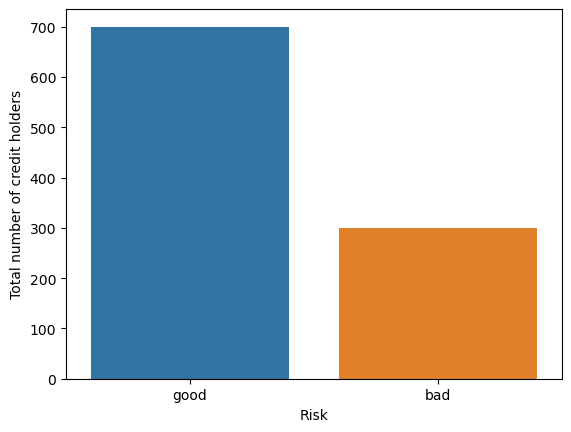

In [29]:
sns.countplot(x=df['Risk'])
plt.ylabel('Total number of credit holders')
plt.show()

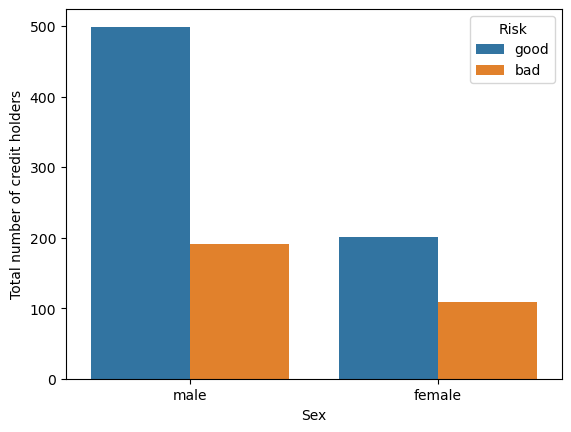

In [30]:
sns.countplot(x=df['Sex'],hue=df['Risk'])
plt.ylabel('Total number of credit holders')
plt.show()

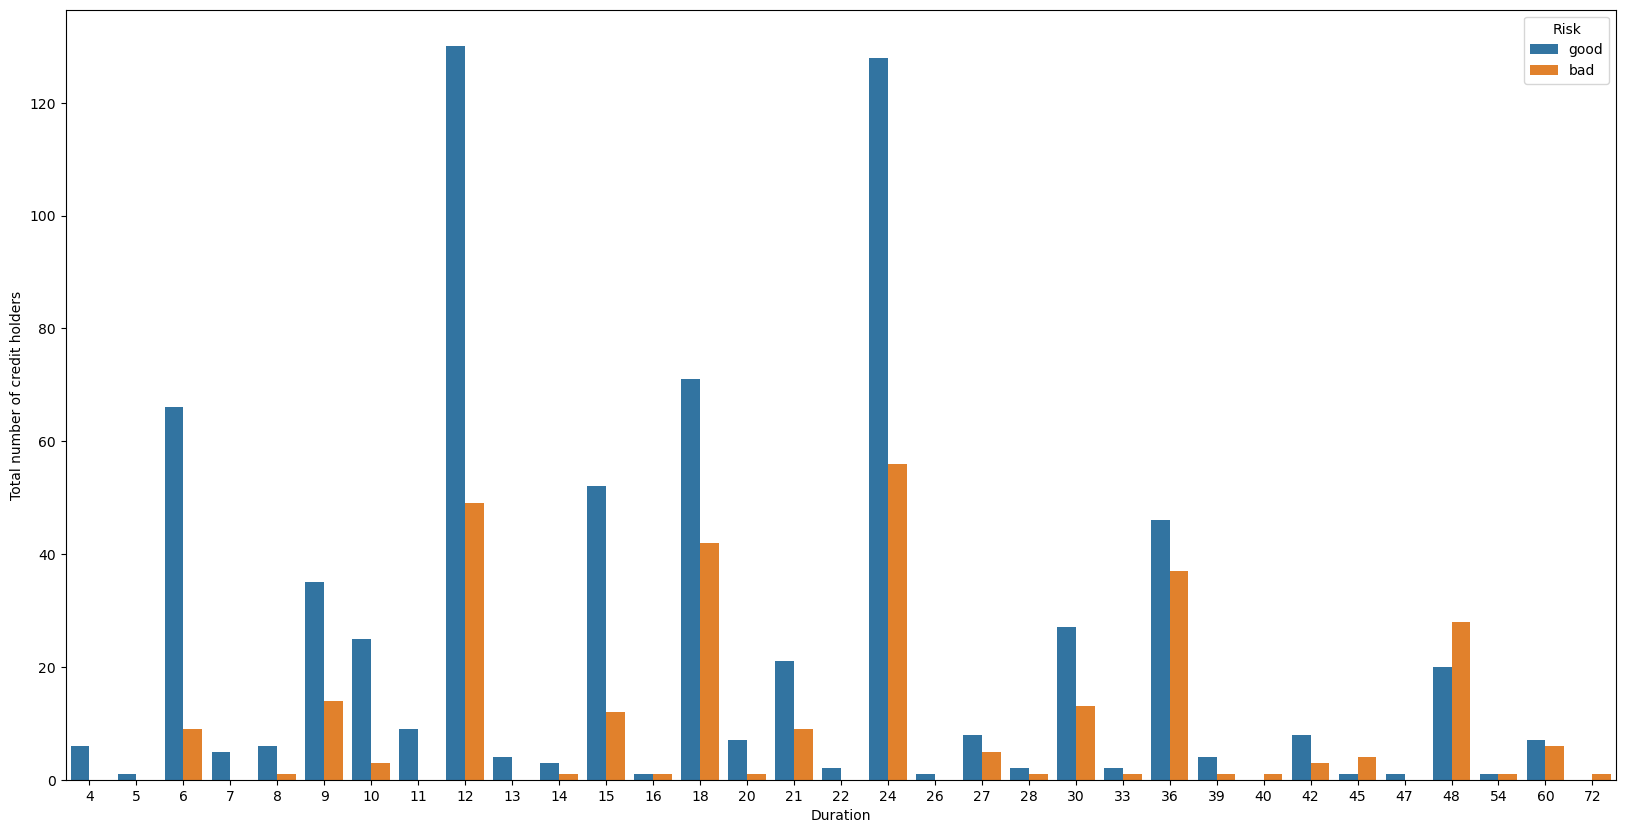

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Duration'],hue=df['Risk'])
plt.ylabel('Total number of credit holders')
plt.show()

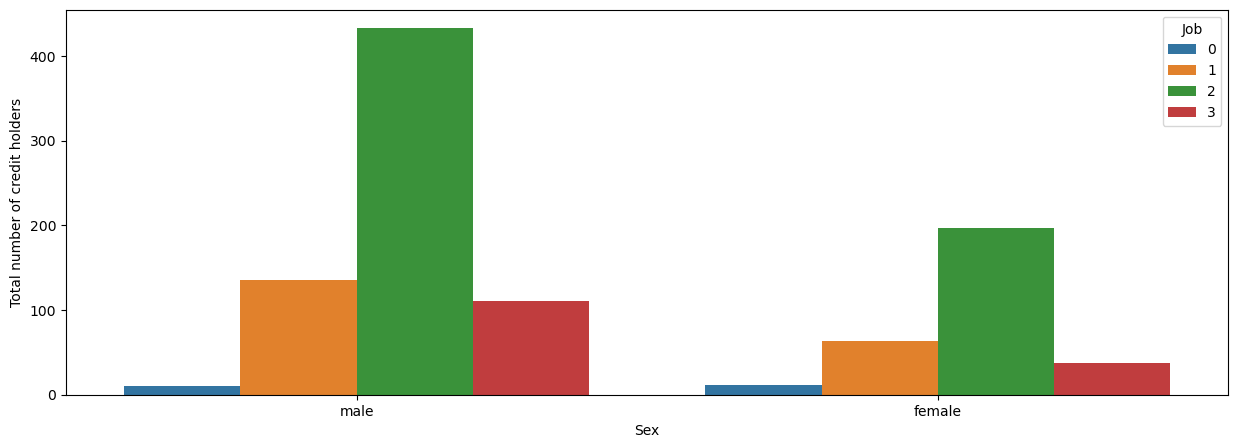

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Sex'],hue=df['Job'])
plt.ylabel('Total number of credit holders')
plt.show()

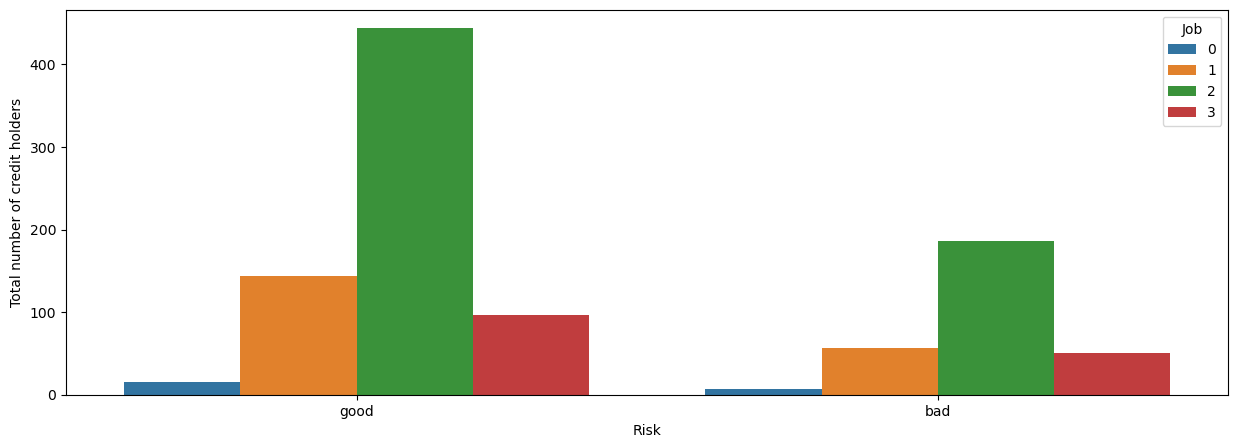

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Risk'],hue=df['Job'])
plt.ylabel('Total number of credit holders')
plt.show()

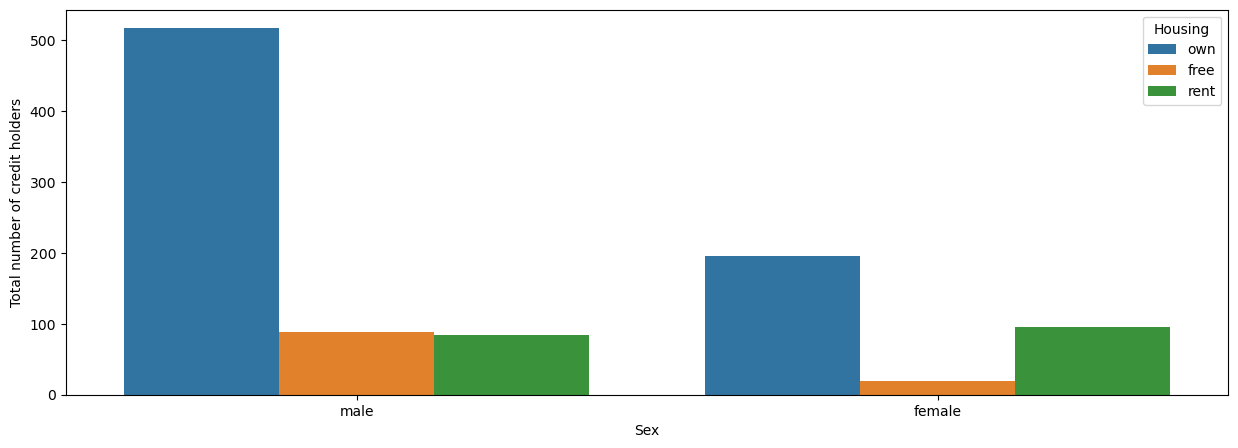

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Sex'],hue=df['Housing'])
plt.ylabel('Total number of credit holders')
plt.show()

In [35]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [36]:
df[df['Purpose']=='radio/TV']

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Id
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
8,8,61,male,1,own,rich,unknown,3059,12,radio/TV,good,8
12,12,22,female,2,own,little,moderate,1567,12,radio/TV,good,12
15,15,32,female,1,own,moderate,little,1282,24,radio/TV,bad,15
...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,good,989
991,991,34,male,1,own,moderate,unknown,1569,15,radio/TV,good,991
992,992,23,male,1,rent,unknown,little,1936,18,radio/TV,good,992
997,997,38,male,2,own,little,unknown,804,12,radio/TV,good,997


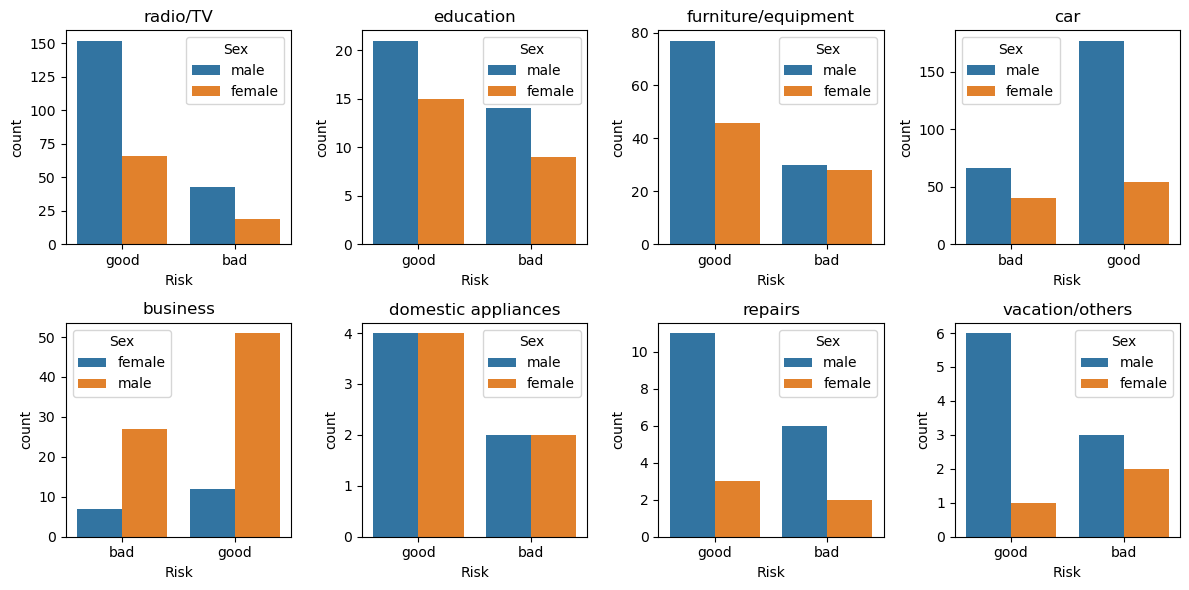

In [37]:
plt.figure(figsize = (12,6))
purpose = df.set_index('Purpose')
n = 1

for i in df['Purpose'].unique().tolist():
    plt.subplot(2,4,n)
    ax = sns.countplot(x = 'Risk', hue = 'Sex', data = purpose.loc[i])
    ax.set_title(i)
    n += 1
plt.tight_layout()

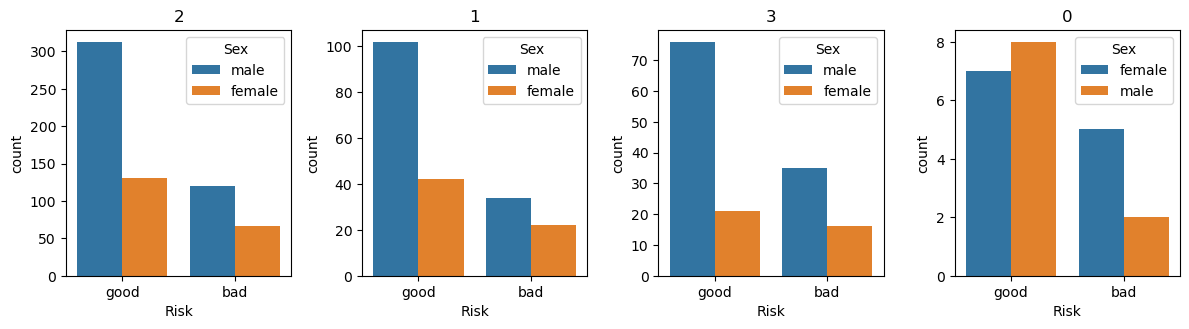

In [38]:
plt.figure(figsize = (12,6))
job= df.set_index('Job')
n = 1

for i in df['Job'].unique().tolist():
    plt.subplot(2,4,n)
    ax = sns.countplot(x = 'Risk', hue = 'Sex', data = job.loc[i])
    ax.set_title(i)
    n += 1
plt.tight_layout()

In [41]:
sns.pairplot(df)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

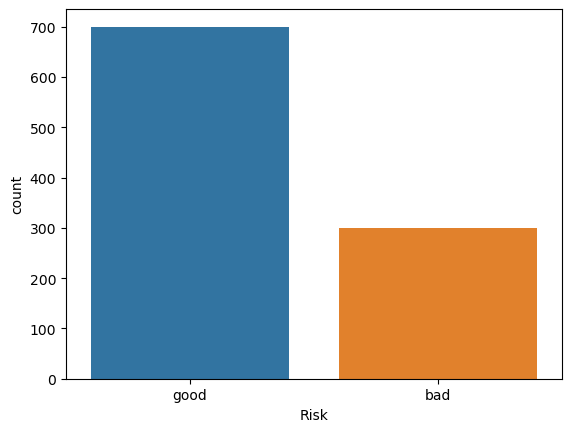

In [40]:
sns.countplot(x='Risk', data=df)
plt.show()

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [42]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk',
       'Id'],
      dtype='object')

In [43]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Id
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,2,49,male,1,own,little,unknown,2096,12,education,good,2
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,3
4,4,53,male,2,free,little,little,4870,24,car,bad,4


In [44]:
purpose=pd.get_dummies(df['Purpose'])
newdf=pd.concat([df,purpose],axis='columns')

In [45]:
newdf.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Id,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good,0,0,0,0,0,0,1,0,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1,0,0,0,0,0,1,0,0
2,2,49,male,1,own,little,unknown,2096,12,education,good,2,0,0,0,1,0,0,0,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,3,0,0,0,0,1,0,0,0
4,4,53,male,2,free,little,little,4870,24,car,bad,4,0,1,0,0,0,0,0,0


In [46]:
newdf.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk',
       'Id', 'business', 'car', 'domestic appliances', 'education',
       'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
      dtype='object')

#### Use label encoding for rest of the categorical data

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

newdf['Sex']=le.fit_transform(df['Sex'])
newdf['Housing']=le.fit_transform(df['Housing'])
newdf['Saving accounts'] = le.fit_transform(df['Saving accounts'])
newdf['Checking account'] = le.fit_transform(df['Checking account'])
newdf['Risk'] = le.fit_transform(df['Risk'])

In [48]:
newdf.drop(columns=['Id','Purpose','car'],inplace=True)

In [50]:
newdf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,business,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1,4,0,1169,6,1,0,0,0,0,1,0,0
1,22,0,2,1,0,1,5951,48,0,0,0,0,0,1,0,0
2,49,1,1,1,0,3,2096,12,1,0,0,1,0,0,0,0
3,45,1,2,0,0,0,7882,42,1,0,0,0,1,0,0,0
4,53,1,2,0,0,0,4870,24,0,0,0,0,0,0,0,0


### Check the unique values in the new dataframe

In [51]:
for i in newdf.columns:
    print("Unique values in ",i, "are :",newdf[i].unique())

Unique values in  Age are : [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Unique values in  Sex are : [1 0]
Unique values in  Job are : [2 1 3 0]
Unique values in  Housing are : [1 0 2]
Unique values in  Saving accounts are : [4 0 2 3 1]
Unique values in  Checking account are : [0 1 3 2]
Unique values in  Credit amount are : [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3

### Plot heatmap

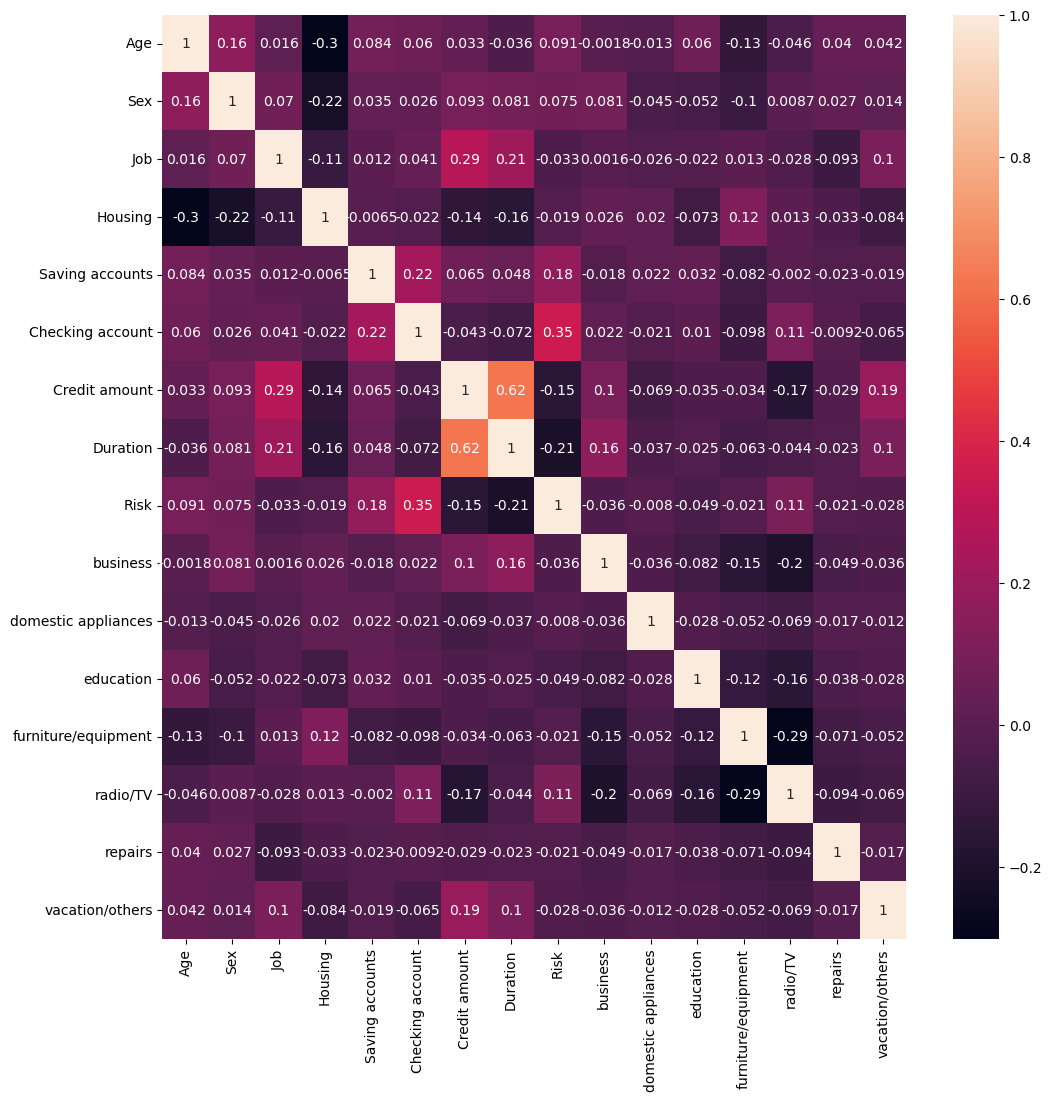

In [52]:
plt.figure(figsize = (12,12))
sns.heatmap(newdf.corr(),annot=True)
plt.show()

## Select the Dependent(target) and Independent Variables:

In [53]:
X=newdf.drop(columns=['Risk'])
y=newdf['Risk']

# Standardize the data

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [55]:
pd.DataFrame(X, columns=newdf.drop(columns=['Risk']).columns.tolist()).head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,business,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,2.766456,0.670280,0.146949,-0.133710,1.833169,-1.254566,-0.745131,-1.236478,-0.327749,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,-1.491914,0.146949,-0.133710,-0.699707,-0.459026,0.949817,2.248194,-0.327749,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,0.670280,-1.383771,-0.133710,-0.699707,1.132053,-0.416562,-0.738668,-0.327749,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.670280,0.146949,-2.016956,-0.699707,-1.254566,1.634247,1.750384,-0.327749,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.670280,0.146949,-2.016956,-0.699707,-1.254566,0.566664,0.256953,-0.327749,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


# Split the data into training and testing set

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state = 42)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [57]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [59]:
model = RandomForestClassifier()
params = {'n_estimators':[16,32,50,100],'max_depth':[0.5,1,5,10],'random_state':[1,10,20,42],
          'n_jobs':[1,2]}
gsc = GridSearchCV(model, params, scoring = 'accuracy')
gsc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]},
             scoring='accuracy')

In [60]:
print("Best estimator is: ", gsc.best_estimator_)
print("Best parameters are: ", gsc.best_params_)
print("Best score is: ",gsc.best_score_)

Best estimator is:  RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=1, random_state=1)
Best parameters are:  {'max_depth': 10, 'n_estimators': 50, 'n_jobs': 1, 'random_state': 1}
Best score is:  0.7474999999999999


In [61]:
model = gsc.best_estimator_
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=1, random_state=1)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [62]:
prediction = model.predict(X_test)
print("Accuracy score is" ,metrics.accuracy_score(prediction, y_test))
print("Confusion metrics:\n" ,metrics.confusion_matrix(prediction,y_test))
print("Classification report:\n", metrics.classification_report(prediction,y_test))
rfscore = cross_val_score(model, X_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", rfscore)

Accuracy score is 0.75
Confusion metrics:
 [[ 19  10]
 [ 40 131]]
Classification report:
               precision    recall  f1-score   support

           0       0.32      0.66      0.43        29
           1       0.93      0.77      0.84       171

    accuracy                           0.75       200
   macro avg       0.63      0.71      0.64       200
weighted avg       0.84      0.75      0.78       200

Cross val score:  0.7474999999999999


#### Visualize the confusion matrix

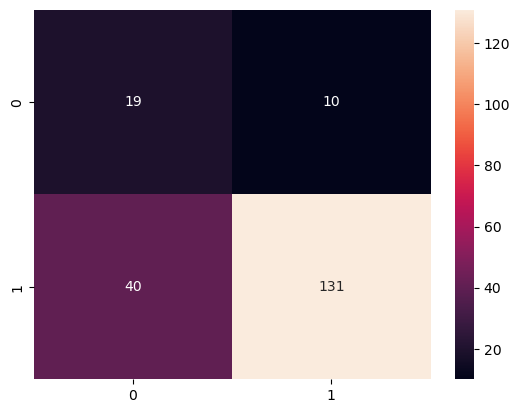

In [63]:
sns.heatmap(metrics.confusion_matrix(prediction,y_test),annot=True, fmt='d')
plt.show()

## SupportVectorClassifier:

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [65]:
model=SVC()
param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
gsc=GridSearchCV(model,param_grid,scoring="accuracy")
gsc.fit(X_train,y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [66]:
print("Best estimator is: ", gsc.best_estimator_)
print("Best parameters are: ", gsc.best_params_)
print("Best score is: ",gsc.best_score_)

Best estimator is:  SVC(C=0.95)
Best parameters are:  {'C': 0.95, 'degree': 3, 'kernel': 'rbf'}
Best score is:  0.7375


In [67]:
model=gsc.best_estimator_
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print("Accuracy score is" ,metrics.accuracy_score(prediction, y_test))
print("Confusion metrics:\n" ,metrics.confusion_matrix(prediction,y_test))
print("Classification report:\n", metrics.classification_report(prediction,y_test))
svmscore = cross_val_score(model, X_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", svmscore)

Accuracy score is 0.76
Confusion metrics:
 [[ 19   8]
 [ 40 133]]
Classification report:
               precision    recall  f1-score   support

           0       0.32      0.70      0.44        27
           1       0.94      0.77      0.85       173

    accuracy                           0.76       200
   macro avg       0.63      0.74      0.64       200
weighted avg       0.86      0.76      0.79       200

Cross val score:  0.7375


## LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Accuracy score is" ,metrics.accuracy_score(prediction, y_test))
print("Confusion metrics:\n" ,metrics.confusion_matrix(prediction,y_test))
print("Classification report:\n", metrics.classification_report(prediction,y_test))
logscore = cross_val_score(model, X_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", logscore)

Accuracy score is 0.75
Confusion metrics:
 [[ 21  12]
 [ 38 129]]
Classification report:
               precision    recall  f1-score   support

           0       0.36      0.64      0.46        33
           1       0.91      0.77      0.84       167

    accuracy                           0.75       200
   macro avg       0.64      0.70      0.65       200
weighted avg       0.82      0.75      0.77       200

Cross val score:  0.72125


## AdaBoost: Classifier

In [69]:

from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("Accuracy score is" ,metrics.accuracy_score(prediction, y_test))
print("Confusion metrics:\n" ,metrics.confusion_matrix(prediction,y_test))
print("Classification report:\n", metrics.classification_report(prediction,y_test))
gradientscore = cross_val_score(model, X_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", gradientscore)


Accuracy score is 0.74
Confusion metrics:
 [[ 22  15]
 [ 37 126]]
Classification report:
               precision    recall  f1-score   support

           0       0.37      0.59      0.46        37
           1       0.89      0.77      0.83       163

    accuracy                           0.74       200
   macro avg       0.63      0.68      0.64       200
weighted avg       0.80      0.74      0.76       200

Cross val score:  0.72875


#### View scores of the different models 

In [71]:
models = pd.DataFrame({'Models':['Random Forest Classifier','Logistic Regression', 
                                 'Gradient Boost Classifier', 'Support Vector Classifier'],
                      'Score':[rfscore,logscore,gradientscore,svmscore]})
models.sort_values(by='Score', ascending = False)            

,Models,Score
0,Random Forest Classifier,0.74750
3,Support Vector Classifier,0.73750
2,Gradient Boost Classifier,0.72875
1,Logistic Regression,0.72125


## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [73]:
pca.n_components_

5

In [75]:
#Apply the mapping (transform) to both the training set and the test set.
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [76]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [77]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [78]:
logisticRegr.fit(train_X,y_train)

LogisticRegression()

In [81]:
logisticRegr.fit(train_X,y_train)

LogisticRegression()

In [80]:
logisticRegr.score(test_X,y_test)

0.71

In [84]:
#Confusion Matrix
from sklearn import metrics
metrics.confusion_matrix(logR_pred,y_test)


NameError: name 'logR_pred' is not defined

In [85]:
from sklearn.model_selection import cross_val_score
logR_cross_val_score = cross_val_score(logisticRegr,train_X,y_train, cv = 10).mean()
logR_cross_val_score

0.7125

## Model Deployment With Tkinter

### Import Tkinter Library

In [86]:
from tkinter import *

### Define a function that will return the output of our prediction in an Entry box in tkinter window

In [88]:

def getPrediction():
    
    age1 = int(age.get())
    gender1 = gender.get()
    housing1 = housing.get()
    job1 = job.get()
    saving1 = savings.get()
    checking1 = checking.get()
    credit1 = int(credit.get())
    duration1 = int(duration.get())
    purpose1 = purpose.get()
    
    
    if gender1 == 'Male':
        gender1 = 0
    else:
        gender1 = 1
    
    if housing1 == 'Free':
        housing1 = 0
    elif housing1 == 'Own':
        housing1 = 1
    else:
        housing1 = 2
        
        
    if job1 == "Unskilled and Resident":
        job1 = 1
    elif job1 == "Skilled":
        job1 = 2
    elif job1 == "Highly Skilled":
        job1 = 3
    else:
        job1 = 0
        
        
    if saving1 == "Unknown":
        saving1 = 0
    elif saving1 == "Little":
        saving1 = 1
    elif saving1 == "Moderate":
        saving1 = 2
    elif saving1 == "Quite Rich":
        saving1 = 3
    else:
        saving1 = 4
        
    if checking1 == "Unknown":
        checking1 = 0
    elif checking1 == "Little":
        checking1 = 1
    elif checking1 == "Moderate":
        checking1 = 2
    else:
        checking1 = 3
        
        
    if purpose1 == "Radio/TV":
        business = 0
        domestic = 0
        education = 0
        furniture = 0
        radio = 1
        repairs = 0
        vacation = 0
    elif purpose1 == "Education":
        business = 0
        domestic = 0
        education = 1
        furniture = 0
        radio = 0
        repairs = 0
        vacation = 0
    elif purpose1 == "Furniture":
        business = 0
        domestic = 0
        education = 0
        furniture = 1
        radio = 0
        repairs = 0
        vacation = 0
    elif purpose1 == "Car":
        business = 0
        domestic = 0
        education = 0
        furniture = 0
        radio = 0
        repairs = 0
        vacation = 0
    elif purpose1 == "Business":
        business = 1
        domestic = 0
        education = 0
        furniture = 0
        radio = 0
        repairs = 0
        vacation = 0
    elif purpose1 == "Domestic Appliance":
        business = 0
        domestic = 1
        education = 0
        furniture = 0
        radio = 0
        repairs = 0
        vacation = 0
    elif purpose1 == "Repairs":
        business = 0
        domestic = 0
        education = 0
        furniture = 0
        radio = 0
        repairs = 1
        vacation = 0
    else:
        business = 0
        domestic = 0
        education = 0
        furniture = 0
        radio = 0
        repairs = 0
        vacation = 1
        
        
    x = [[age1, gender1, job1, housing1, saving1, checking1, credit1, duration1, business, domestic, education, furniture, radio, repairs, vacation]]
    
    x = sc.transform(x)
    
    x = pca.transform(x)
    
    result = logisticRegr.predict(x)

    resultbox.delete(0, END)
    
    if result[0] == 1:
        resultbox.insert(0, 'Good')
    elif result[0] == 0:
        resultbox.insert(0, 'Bad')
    else:
        resultbox.insert(0, 'Error')

### Create Tkinter window and all necessary input and output boxes

In [63]:

window = Tk()


window.geometry("450x550")

window.title('German Credit Risk Analysis')

label = Label(window ext = 'Enter the Details here:', font=('calibre',10, 'bold')).pack()

agelabel = Label(window, text = 'Age').pack()
age = Entry(window)
age.pack()

gender = StringVar()
genderlabel = Label(window, text = "Gender").pack()
gender_options = ["Male", "Female"]
gender.set(gender_options[0])
gender_drop = OptionMenu(window, gender, *gender_options).pack()

housing = StringVar()
housinglabel = Label(window, text = "Housing").pack()
housing_options = ["Free", "Own", "Rent"]
housing.set(housing_options[0])
housing_drop = OptionMenu(window, housing, *housing_options).pack()

job = StringVar()
joblabel = Label(window, text = "Job").pack()
job_options = ['Unskilled and Resident', 'Skilled', 'Highly Skilled', 'Unskilled and Non Resident']
job.set(job_options[0])
jobdrop = OptionMenu(window, job, *job_options).pack()

savings = StringVar()
savingslabel = Label(window, text = "Savings Account").pack()
savings_options = ['Unknown', 'Little','Moderate', 'Quite Rich','Rich']
savings.set(savings_options[0])
savingsdrop = OptionMenu(window , savings , *savings_options ).pack()

checking = StringVar()
checkinglabel = Label(window, text = "Checking Account").pack()
checking_options = ['Unknown', 'Little', 'Moderate','Rich']
checking.set(checking_options[0])
checkingdrop = OptionMenu(window , checking , *checking_options ).pack()

creditlabel = Label(window, text = 'Credit Amount').pack()
credit = Entry(window)
credit.pack()

durationlabel = Label(window, text = "Duration in Months").pack()
duration = Entry(window)
duration.pack()

purpose = StringVar()
purposelabel = Label(window, text = "Purpose of Credit").pack()
purpose_options = ["Radio/TV", "Education", "Furniture", "Car", "Business","Domestic Appliance", "Repairs", "Vacation"]
purpose.set(purpose_options[0])
purposedrop = OptionMenu(window, purpose, *purpose_options).pack()


button = Button(window, text = 'Get Prediction', command = getPrediction).pack()


resultlabel = Label(window, text = "Credit Risk").pack()
resultbox = Entry(window)
resultbox.pack()

window.mainloop()